In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

df_movie=pd.read_csv("data/movie_comments.csv",dtype={"score":np.float64,"content":str})
df_cele=pd.read_csv("data/cele_comments.csv",dtype={"score":np.float64})

group_id_movie=df_movie.groupby("id")
group_id_cele=df_cele.groupby("id")

commentlen_movie=list(map(lambda x:len(str(x)),df_movie["content"]))
commentlen_cele=list(map(lambda x:len(str(x)),df_cele["content"]))

mean_commentlen_movie=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_movie
]	# top250每部电影短评的平均长度
mean_commentlen_cele=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_cele
]	# 对照组每部作品短评的平均长度

print(np.std(mean_commentlen_movie),np.std(mean_commentlen_cele))
print(np.mean(mean_commentlen_movie),np.mean(mean_commentlen_cele))

std_movie_score=[np.std(i[1]["score"]) for i in group_id_movie]
std_cele_score=[np.std(i[1]["score"]) for i in group_id_cele]

fig=plt.figure(figsize=(15,7))
ax=fig.add_axes([0, 0, 1, 1])

ax.scatter(range(250),std_movie_score,color="b")
ax.scatter(np.linspace(0,250,80),std_cele_score,color="r")

# ax.bar(range(len(mean_commentlen_movie)),mean_commentlen_movie,width=0.5)
# ax.bar(range(len(mean_commentlen_cele)),mean_commentlen_cele,width=0.5)

plt.show()

KeyError: 'id'

肖申克的救赎 1.567404646581049
霸王别姬 1.1240973199487132
阿甘正传 1.15730038527966
泰坦尼克号 1.1724620882835892
美丽人生 1.130090752919537
这个杀手不太冷 1.2052186504402296
千与千寻 1.2120188976604094
辛德勒的名单 1.5689784188304048
楚门的世界 1.2355672073843467
盗梦空间 1.2293462080265352
忠犬八公的故事 1.2069894281326023
海上钢琴师 1.4151406357458416
三傻大闹宝莱坞 1.385087058079046
放牛班的春天 1.2513914574237541
机器人总动员 1.2510552817655882
无间道 1.290959124384048
疯狂动物城 1.3582174880521034
控方证人 1.5585054624837809
星际穿越 1.367084154235857
大话西游之大圣娶亲 1.689176434030239
熔炉 1.2364001460387004
教父 1.405600004306919
当幸福来敲门 1.2339883452426408
触不可及 1.1674181425626207
怦然心动 1.2981959705643222
龙猫 1.4430312083667607
末代皇帝 1.1412687512977608
寻梦环游记 1.6269337401570882
活着 1.1468696655841082
蝙蝠侠：黑暗骑士 1.488549051843226
哈利·波特与魔法石 1.2886808367071525
指环王3：王者无敌 1.4419006238859182
乱世佳人 1.1540562153340612
我不是药神 1.6310419032593917
素媛 1.2726558375940757
飞屋环游记 1.3932830635613376
何以为家 1.628148148148148
十二怒汉 1.1784407047842682
哈尔的移动城堡 1.276050002485213
摔跤吧！爸爸 1.6087471352177234
鬼子来了 1.548900

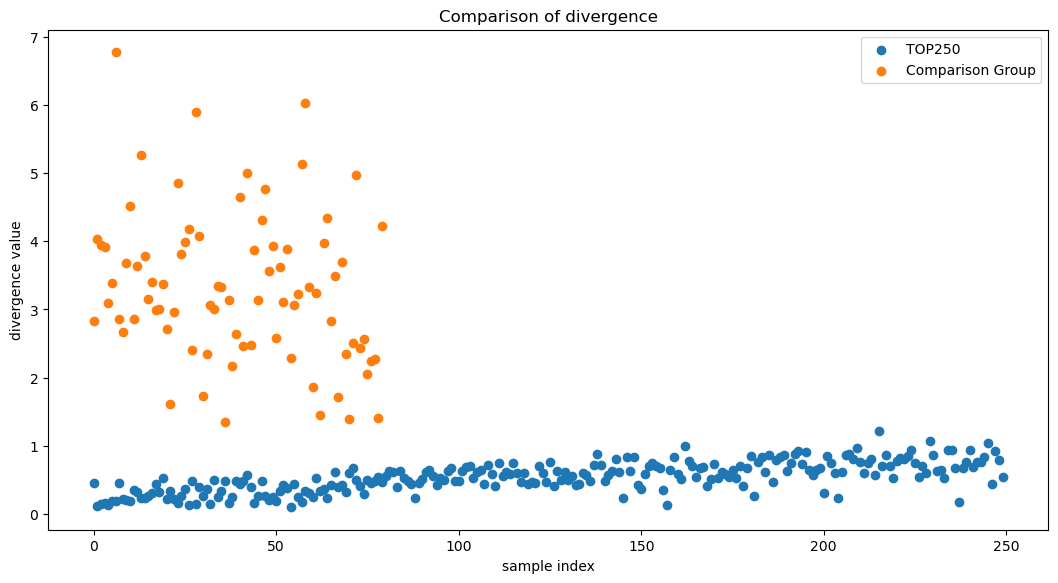

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rating_ratio=pd.read_csv("data/rating_ratio.csv")

dive=[]

for item in rating_ratio.iterrows():
    diver=0.0
    stars=item[1][2:8]

    s_diff=[]
    diff=[]
    for i in range(1,5):
        for j in range(i+1,6):
            val_1=stars[i]*stars[0]/100
            val_2=stars[j]*stars[0]/100
            if abs(val_1-val_2)==0 or abs(val_2-val_1)==1:
                val_1+=1.1
            s_diff.append(j-i)
            diff.append(abs(val_1/val_2))
    for i in range(10):
        diver+=s_diff[i]/diff[i]
    print(item[1]["title"],diver)
    dive.append(np.log(diver))

fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0, 0, 1, 1])

ax.scatter(range(250),dive[:250])
ax.scatter(range(80),dive[-80:])
ax.set_ylabel("divergence value")
ax.set_xlabel("sample index")
ax.set_title("Comparison of divergence")
ax.legend(["TOP250","Experimental Group"])

plt.show()

In [ ]:
import pandas as pd

df=pd.read_csv("data/rawdata.csv")

df

,title,work_id,rating,score_num,comment_num,ratio,5star_num,4star_num,3star_num,2star_num,1star_num,watched_num
0,肖申克的救赎,1292052,9.7,2826380,553533,0.196,392,103,26,15,8,4617672.0
1,霸王别姬,1291546,9.6,2094515,445227,0.213,410,69,14,16,10,3545877.0
2,阿甘正传,1292720,9.5,2116313,354470,0.167,345,128,25,8,12,3838521.0
3,泰坦尼克号,1292722,9.5,2124229,422456,0.199,368,144,24,6,2,3957269.0
4,这个杀手不太冷,1295644,9.4,2250555,383893,0.171,356,137,24,11,7,4140356.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,沉香如屑·沉香重华,35029547,5.9,522432,320607,0.614,131,83,95,121,125,746331.0
326,冰雨火,34908108,7.3,164681,92972,0.565,207,74,134,74,58,235258.0
327,幸福到万家,34951002,7.1,243179,133022,0.547,170,73,139,96,79,347398.0
328,奇迹·笨小孩,35312437,7.4,540284,207305,0.384,197,172,130,24,29,771834.0
